In [1]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=31ea3669800b3f53e509c26a3f15e67489fd7244c390db4ce695f185e81af1e1
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    U

In [1]:
from ISLP import models
from ISLP import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 9a

In [2]:
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [3]:
dis = Boston["dis"]
nox = Boston["nox"]

In [4]:
dis_poly = models.poly('dis', degree=3)

In [5]:
poly_dis = models.ModelSpec([dis_poly], intercept=False)

In [6]:
feature = poly_dis.fit_transform(Boston)

In [7]:
feature["nox"] = nox

In [8]:
feature.columns = ['dis', 'dis2', 'dis3', 'nox']

In [9]:
M = smf.ols(formula='nox ~ dis + dis2 + dis3', data=feature).fit()

In [10]:
models.summarize(M)

,coef,std err,t,P>|t|
Intercept,0.5547,0.003,201.021,0.0
dis,-2.0031,0.062,-32.271,0.0
dis2,0.8563,0.062,13.796,0.0
dis3,-0.3180,0.062,-5.124,0.0


In [11]:
M.ssr

1.9341067071790703

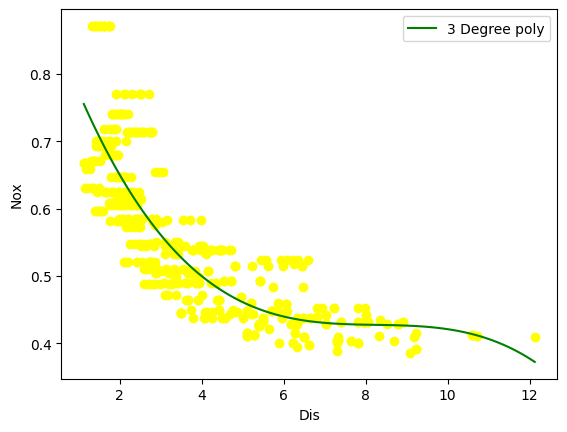

In [12]:
coeff = np.polyfit(dis, nox, 3)

x_smooth = np.linspace(min(dis), max(dis), 100)
y_smooth = np.polyval(coeff, x_smooth)

plt.scatter(dis, nox, color="yellow")
plt.plot(x_smooth, y_smooth, color='green', label='3 Degree poly')
plt.xlabel('Dis')
plt.ylabel('Nox')
plt.legend()
plt.show()

## 9b

<ipython-input-13-5545684e1fa0>:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_poly = np.column_stack(dis**i for i in range(1, d+1))
<ipython-input-13-5545684e1fa0>:17: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  y_sm = np.dot(np.column_stack(x_sm**i for i in range(1, d+1)), coeff)


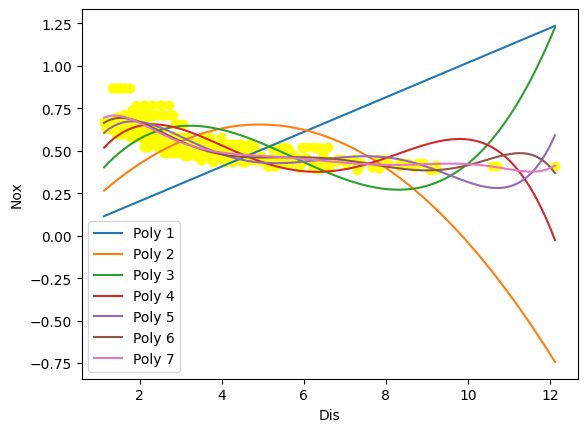

Degree 1: Residual Sum of Squares = 63.627134889788664
Degree 2: Residual Sum of Squares = 25.0296588166897
Degree 3: Residual Sum of Squares = 9.774347448285267
Degree 4: Residual Sum of Squares = 4.187272359782591
Degree 5: Residual Sum of Squares = 2.4077309299124243
Degree 6: Residual Sum of Squares = 1.926847610470808
Degree 7: Residual Sum of Squares = 1.85061706380675


In [13]:
res = []

for d in range(1, 8):

    poly_feature = models.poly('dis', d)

    X_poly = np.column_stack(dis**i for i in range(1, d+1))

    coeff = np.linalg.lstsq(X_poly, nox, rcond=None)[0]

    y_hat = np.dot(X_poly, coeff)

    rss = np.sum((nox - y_hat)**2)
    res.append(rss)

    x_sm = np.linspace(min(dis), max(dis), 100)
    y_sm = np.dot(np.column_stack(x_sm**i for i in range(1, d+1)), coeff)
    plt.plot(x_sm, y_sm, label=f'Poly {d}')

plt.scatter(dis, nox, color="yellow")
plt.xlabel('Dis')
plt.ylabel('Nox')
plt.legend()
plt.show()

for degree, rss in enumerate(res, 1):
    print(f'Degree {degree}: Residual Sum of Squares = {rss}')

## 9c

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [15]:
deg = np.arange(1, 10)
cv = []

for d in deg:
    # Create polynomial features
    poly_feature = PolynomialFeatures(d)
    X_poly = poly_feature.fit_transform(Boston[['dis']])

    model = LinearRegression()

    # Cross-validation
    scores = cross_val_score(model, X_poly, Boston['nox'], cv=3, scoring='neg_mean_squared_error')

    print("Poly " + str(d) + " : RSS  = ", str(-np.mean(scores)))
    cv.append(-np.mean(scores))

optimal_degree = deg[np.argmin(cv)]

print(f'The optimal degree is {optimal_degree} based on cross-validation.')

Poly 1 : RSS  =  0.0067735153446204155
Poly 2 : RSS  =  0.004793913878779914
Poly 3 : RSS  =  0.006445452715006998
Poly 4 : RSS  =  0.01203832194628014
Poly 5 : RSS  =  0.027763724919862384
Poly 6 : RSS  =  0.01636132594865555
Poly 7 : RSS  =  0.041252865454584196
Poly 8 : RSS  =  4.078325077502655
Poly 9 : RSS  =  1.2594195679251101
The optimal degree is 2 based on cross-validation.


## Chapter 8 Exercise 3

<ipython-input-16-404679b729bc>:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -pm1 * np.log2(pm1) - pm2 * np.log2(pm2)
<ipython-input-16-404679b729bc>:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -pm1 * np.log2(pm1) - pm2 * np.log2(pm2)


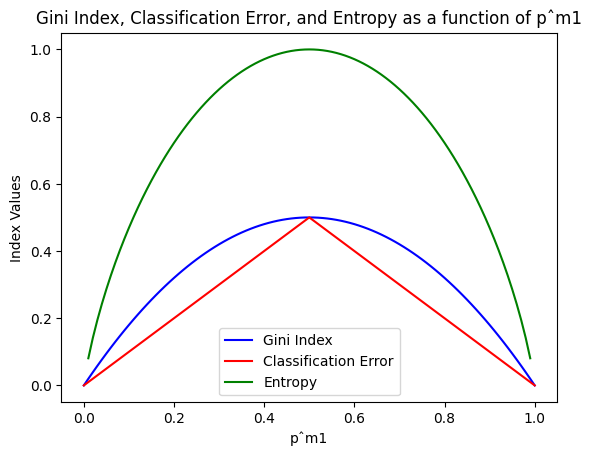

In [16]:
import numpy as np
import matplotlib.pyplot as plt

pm1 = np.arange(0, 1.01, 0.01)

pm2 = 1 - pm1

gini_index = 2 * pm1 * pm2
classification_error = 1 - np.maximum(pm1, pm2)
entropy = -pm1 * np.log2(pm1) - pm2 * np.log2(pm2)

plt.plot(pm1, gini_index, label='Gini Index', color='blue')
plt.plot(pm1, classification_error, label='Classification Error', color='red')
plt.plot(pm1, entropy, label='Entropy', color='green')

plt.xlabel('pˆm1')
plt.ylabel('Index Values')
plt.title('Gini Index, Classification Error, and Entropy as a function of pˆm1')
plt.legend()

## Chapter 8 Exercise 5

In [17]:
import numpy as np

# Provided estimates of P(Class is Red|X)
probabilities = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])

# Majority Vote Approach
majority_vote = "Red" if np.sum(probabilities >= 0.5) > len(probabilities) / 2 else "Green"

# Average Probability Approach
average_probability = np.mean(probabilities)
average_vote = "Red" if average_probability >= 0.5 else "Green"

# Print the results
print(f"Majority Vote Approach: {majority_vote}")
print(f"Average Probability Approach: {average_vote}")

Majority Vote Approach: Red
Average Probability Approach: Green


## Chapter 8 Exercise 8

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
import patsy as pt
from sklearn import tree
import graphviz
from sklearn import metrics
import seaborn as sns
sns.set()

# 8a, 8b

In [19]:
carseats_data = load_data('Carseats')

In [20]:
np.random.seed(1)
train = np.random.random(len(carseats_data)) > 0.5

preds = carseats_data.columns.drop(['Sales'])

f = 'Sales ~ 0 +' + ' + '.join(preds)
y, X = pt.dmatrices(f, carseats_data)
y = y.flatten()

clf = tree.DecisionTreeRegressor(max_depth=5).fit(X[train], y[train])

# Measure test set MSE
y_hat = clf.predict(X[~train])
mse = metrics.mean_squared_error(y[~train], y_hat)

print('Test MSE: {}'.format(np.around(mse, 3)))
print('Test RMSE: {}'.format(np.around(np.sqrt(mse), 3)))

Test MSE: 5.09
Test RMSE: 2.256


## 8c

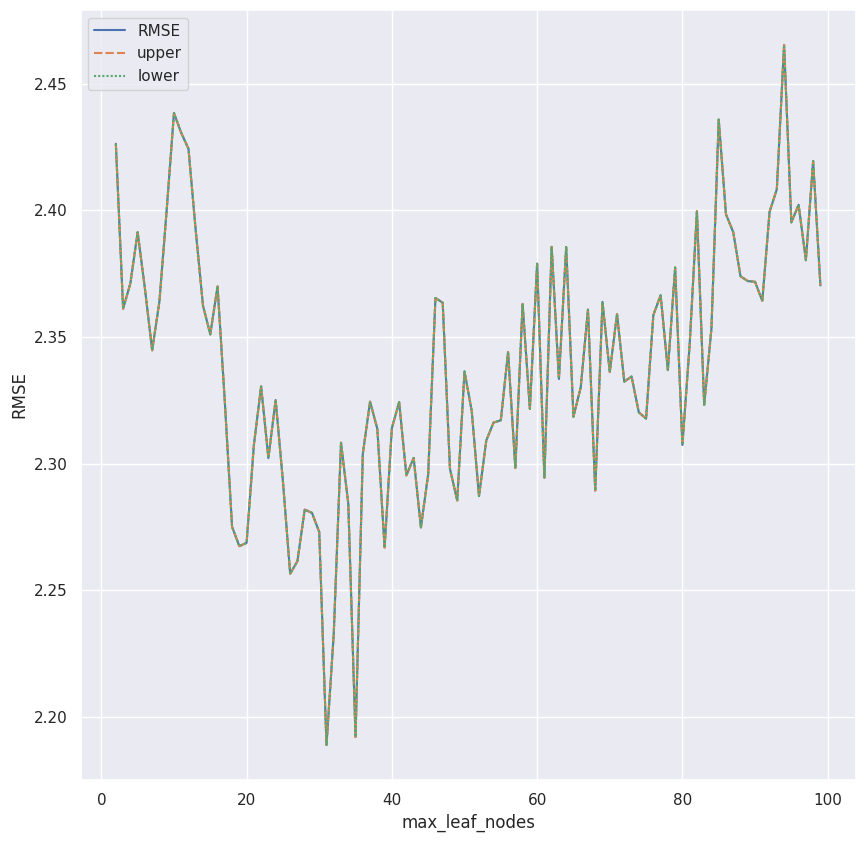

,RMSE,upper,lower
max_leaf_nodes,,,
31.0,2.188901,2.188901,2.188901


Test MSE : 4.661
Test RMSE: 2.159


In [21]:
# Cross validation selected was 10
cv = 10

# Parameter to be used for hyper parameter tuning
params = 'max_leaf_nodes'

columns=[params, 'RMSE', 'upper', 'lower']


# Storing the result of rmse
result = []

for m in np.arange(2, 100):
    regr = tree.DecisionTreeRegressor(max_leaf_nodes=m)
    score = cross_val_score(regr, X[train], y[train], cv=cv, scoring='neg_mean_squared_error')
    rss = np.sqrt(np.absolute(score))
    rmse = np.mean(rss)
    conf_int = np.std(rmse) *2
    result += [[m, rmse, rmse+conf_int, rmse-conf_int]]

plot_df = pd.DataFrame(np.asarray(result), columns=columns).set_index(params)
plt.figure(figsize=(10,10))
sns.lineplot(data=plot_df)
plt.ylabel('RMSE')
plt.show();

chs = plot_df[plot_df['RMSE'] == plot_df['RMSE'].min()]
display(chs)

dec_reg  = tree.DecisionTreeRegressor(max_leaf_nodes=int(chs.index[0])).fit(X[train], y[train])
y_pred = dec_reg.predict(X[~train])
mse = metrics.mean_squared_error(y[~train], y_pred)

print('Test MSE : {}'.format(np.around(mse, 3)))
print('Test RMSE: {}'.format(np.around(np.sqrt(mse), 3)))

# 8d

Test MSE: 2.611
Test RMSE: 1.616


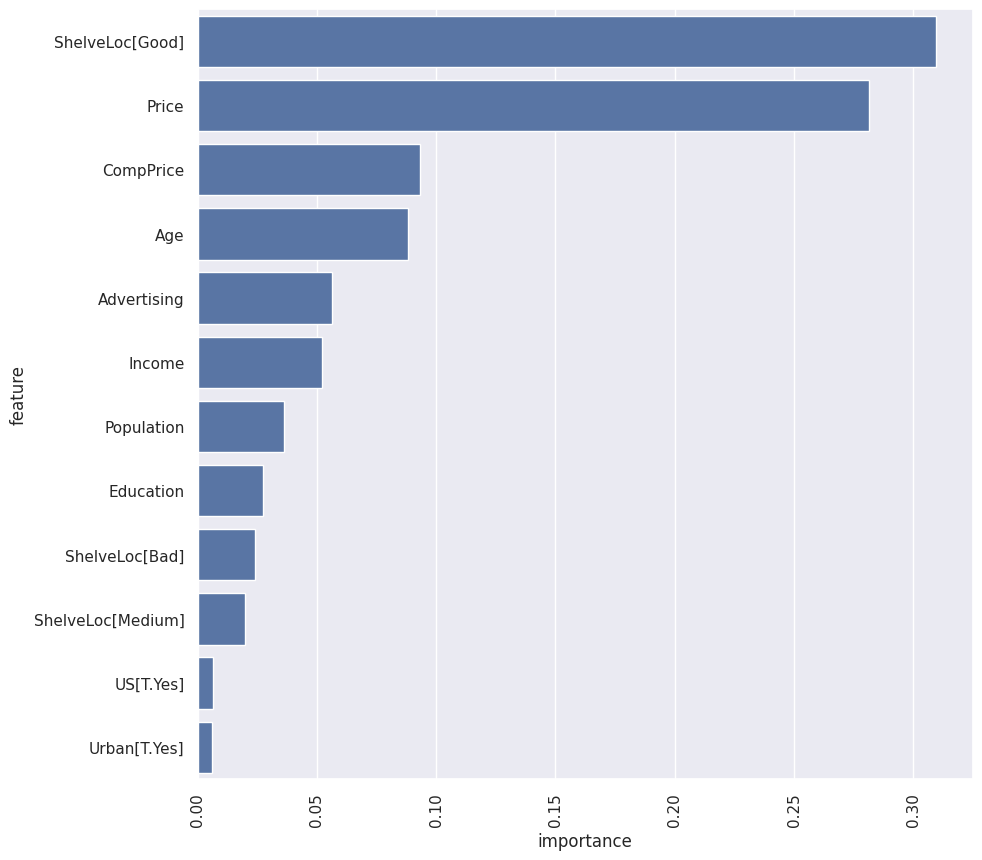

In [22]:
# Set the maximum number of features and the number of trees in the forest
max_features = X.shape[1]
tree_count = 100

# Initialize a RandomForestRegressor
forest_regressor = RandomForestRegressor(max_features=max_features, random_state=0, n_estimators=tree_count)

# Fit the RandomForestRegressor to the training set
forest_regressor.fit(X[train], y[train])

# Make predictions on the test set
y_predictions = forest_regressor.predict(X[~train])

# Calculate and print the test MSE and RMSE
test_mse = metrics.mean_squared_error(y[~train], y_predictions)
test_rmse = np.sqrt(test_mse)

print('Test MSE: {}'.format(np.around(test_mse, 3)))
print('Test RMSE: {}'.format(np.around(test_rmse, 3)))

# Create a DataFrame to store feature importances
plot_df = pd.DataFrame({'feature': X.design_info.column_names, 'importance': forest_regressor.feature_importances_})

# Plot feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False), color='b')
plt.xticks(rotation=90)
plt.show()

# 8e

Test MSE: 2.566
Test RMSE: 1.602


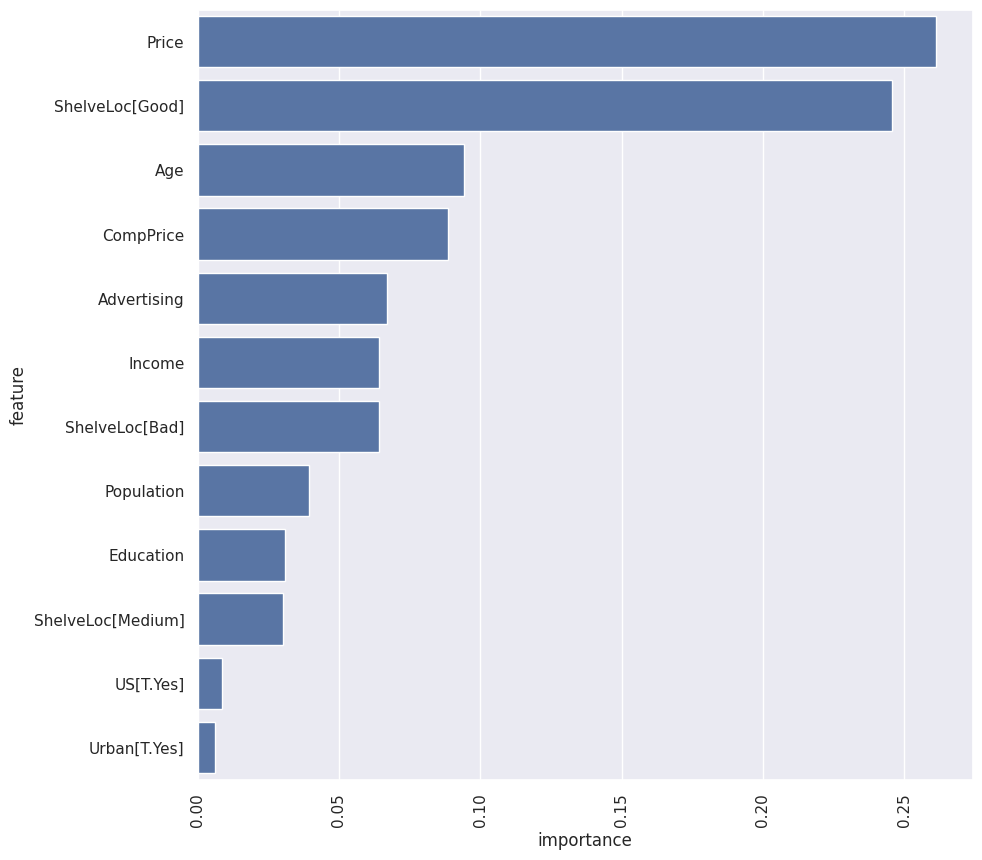

In [23]:
# Set the maximum number of features and the number of trees in the forest
max_selected_features = 7
tree_count = 100

# Initialize a RandomForestRegressor
forest_regressor = RandomForestRegressor(max_features=max_selected_features, random_state=0, n_estimators=tree_count)

# Fit the RandomForestRegressor to the training set
forest_regressor.fit(X[train], y[train])

# Make predictions on the test set
y_predictions = forest_regressor.predict(X[~train])

# Calculate and print the test MSE and RMSE
test_mse = metrics.mean_squared_error(y[~train], y_predictions)
test_rmse = np.sqrt(test_mse)

print('Test MSE: {}'.format(np.around(test_mse, 3)))
print('Test RMSE: {}'.format(np.around(test_rmse, 3)))

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'feature': X.design_info.column_names, 'importance': forest_regressor.feature_importances_})

# Plot feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.sort_values('importance', ascending=False), color='b')
plt.xticks(rotation=90)
plt.show()

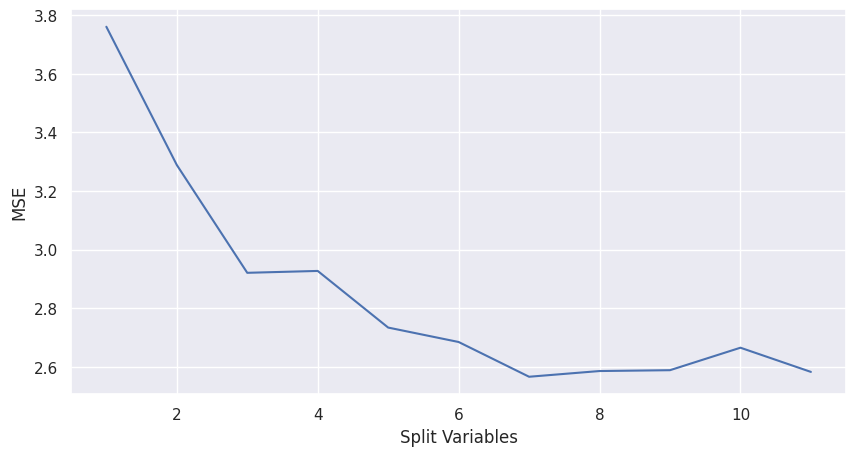

In [24]:
# Set the range for the number of split variables
split_variable_range = np.arange(1, X.shape[1])
# Initialize an empty list to store results
results = []

# Loop through different numbers of split variables
for max_features in split_variable_range:
    tree_count = 100

    # Initialize RandomForestRegressor with the current number of split variables
    forest_regressor = RandomForestRegressor(max_features=max_features, random_state=0, n_estimators=tree_count)

    # Fit the RandomForestRegressor to the training set
    forest_regressor.fit(X[train], y[train])

    # Make predictions on the test set
    y_predictions = forest_regressor.predict(X[~train])

    # Calculate MSE and RMSE
    mse = metrics.mean_squared_error(y[~train], y_predictions)

    # Append results to the list
    results.append([max_features, mse])

# Plot the results
plt.figure(figsize=(10, 5))
sns.lineplot(x='Split Variables', y='MSE', data=pd.DataFrame(results, columns=['Split Variables', 'MSE']))
plt.show()

In [25]:
carseats_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [26]:
carseats_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

## 8f

In [29]:
from ISLP import bart

In [30]:
bart_cartesian = bart.BART(random_state=0, burnin=5, ndraw=15)

In [31]:
bart_cartesian.fit(X[train], y[train])

BART(burnin=5, ndraw=15, random_state=0)

In [32]:
yhat_test = bart_cartesian.predict(X[~train])

In [33]:
mse = metrics.mean_squared_error(y[~train], yhat_test)

In [34]:
rmse = np.sqrt(mse)

In [35]:
mse

1.6144505080029672

In [36]:
rmse

1.270610289586452

## 8f Alternative Solution

In [27]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.0 MB/s eta 0:00:00


In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

sales_strings = carseats_data['Sales'].astype(str).tolist()

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
tokenized_data = tokenizer.batch_encode_plus(sales_strings, return_tensors='pt', max_length=1024, truncation=True)

model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

summaries = []
for input_ids in tokenized_data['input_ids']:
    summary_ids = model.generate(input_ids.unsqueeze(0), max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)
    summary = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
    summaries.append(summary)

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

(…)-cnn/resolve/main/generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]